# Метод Монте-Карло

Судь метода в том, что при многократном повторении эксперимента, распределение его значений приближается к вероятностям наступления данных событий.
- Метод очень удобен, когда надо решить сложную задачу с использованием статистики/вероятностей или проверить результаты, полученные по формуле.

### Задача: 
- В комнате собрались 23 человека. Какая вероятность, что кого-то из этих людей совпали дни рождения? (парадокс дней рождений)

In [26]:
import pandas as pd
import numpy as np
from math import factorial

In [13]:
dr = pd.Series(range(365)) # создаем список с возможными днями рождения
coincidence = [dr.sample(23, replace=True).duplicated().max() for _ in range(10000)] #duplicated() ищет дубликаты 
                                                                                     # в полученном списке
pd.Series(coincidence).mean()

0.501

Задача имееет аналитическое решение:
- Будем отталкиваться от дополняющей вероятности, т.е. что дни рождения ни у кого не совпали
- Дополняющая вероятность считается так: 364/365 * (363/365) *...* ((365-n+1)/365)  =  365! / (365-n)! / 365**n

In [28]:
1-factorial(365)/factorial(365-23)/365**23

0.5072972343239854

### Задача: 
- Ночью произошло ДТП с участием такси. В городе работают две компании такси — «Синие» и «Зелёные». «Зелёным» принадлежит 85% такси, «Синим» 15%. Свидетель аварии утверждает, что такси принадлежало «Синим». Следственный эксперимент показал, что ночью свидетель верно определяет цвет такси в 80%. Какова вероятность того, что такси действительно принадлежало «Синим»?

In [33]:
np.random.binomial(1, 0.15) #генератор, который выдает '1' (синее такси) в 15% случаев (т.к. Синих 15%)

np.random.binomial(1, 0.8) # генератор, который имитирует показание свидетеля при синей машине
np.random.binomial(1, 0.2) # генератор, который имитирует показание свидетеля при зеленой машине

0

In [36]:
witness = [] # список со значениями, когда свидетель сказал, что видел синюю машину
real = [] # список со значениями, когда свидетель сказал, что видел синюю машину и она действительно была синей
for _ in range(100000):
    if np.random.binomial(1, 0.15) ==1: # машина синяя
        witness.append(np.random.binomial(1, 0.8)) # свидетель прав только в 80% случаев
        real.append(np.random.binomial(1, 0.8))
    else: # машина зеленая
        witness.append(np.random.binomial(1, 0.2)) # свидетель не прав в 20%
        real.append(0) # тут 0, т.к. мы знаем, что машина была зеленая np.random.binomial(1, 0.15) ==0
pd.Series(real).sum() / pd.Series(witness).sum() 

0.4137357496794761

Сама задача довольно легко решается аналитически. Из 100 случаев аварий, в 85 будут участвовать зеленые машины, в 15 - синие.
- Свидетель угадает 15 х 0.8 синих машин = 12
- Но ошибется в 85*0.2 = 17 машинах.
- Вероятность, что названное свиделем такси действительно синее: 12/(12+17) = 0.413

### Задача:
- Вирус XYZ находят в среднем у одного человека из тысячи. Существует тест, показывающий, заражён человек XYZ или нет. Однако этот тест в 5% даёт ложное срабатывание — показывает факт заражения, когда на самом деле человек здоров.
- Предположим, что тестирование взятого наугад человека показало, что он XYZ-инфицирован. Какова вероятность того, что он на самом деле болен?

In [63]:
test = [] # случаи положительного срабатывания теста
real = [] # случаи, когда человек реально был заражен

for _ in range(100000):
    if np.random.binomial(1, 0.001) ==1: # вероятность,что человек болен 0.1% (1/1000)
        test.append(np.random.binomial(1, 0.95)) # тест определит больного человека в 95% случаев
        real.append(np.random.binomial(1, 0.95))
    else: # человек здоров
        test.append(np.random.binomial(1, 0.05)) # тест может быть ложноположительным
        real.append(0) # тут 0, т.к. мы знаем, что человек здоров
pd.Series(real).sum() / pd.Series(test).sum() 

0.018525741029641187

Аналитическое решение тут аналогичное предыдущей задаче:
- Мы провели 1000 тестирований. Согласно условию задачи, у нас должен быть 1 зараженный человек и 999 здоровых. И выявим мы этого зараженного в 95% случаев, т.е. 1 х 0.95
- При проведении тестирования, тест покажет положительный результат: 1 х 0.95(тот самый зараженный) + 999 х 0.05(ложные срабатывания) = 50.9 человек
- Отношение 1*0.95 к 50.9 и будет нашей вероятностью (0.0186)

В целом эти решения связаны с условной вероятностью и описываются формулой Байеса:

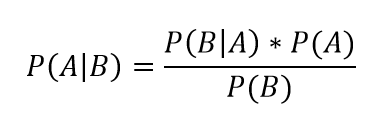

In [56]:
# P(A|B) - вероятность, что человек болен(A) при условии, что тест дал положительный результат (В)
# P(B|A) = 0.95 - тест правильно определяет заболевшего в 95% случаев
# P(A) = 0.001 - вероятность, что человек болен
# P(B) = 0.001*0.95(болен) + 0.999*0.05(здоров, ложноположительный)
0.95*0.001/(0.95*0.001+0.05*0.999)

0.018664047151277015

### Задача
- Студет выучил 20 билетов из 30. Изменится ли вероятность сдачи экзамена, если он пойдет в класс не первым, а вторым?

In [65]:
student = list(range(1,21)) # то, что знает студент
tickets = list(range(1,31)) # все билеты
student

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [83]:
from random import shuffle
n=100000
counter = 0
for _ in range(n):
    tickets = list(range(1,31))
    shuffle(tickets)
    if tickets[0] in student:
        counter +=1
print(counter/n)      

0.66656


In [87]:
n=100000
counter = 0
for _ in range(n):
    tickets = list(range(1,31))
    shuffle(tickets)
    tickets.pop(0) # кто-то пошел первым и вытянул один билет
    shuffle(tickets)
    if tickets[0] in student:
        counter +=1
print(counter/n) 

0.6658


Аналитическое решение:
- Вероятность, что студен сдаст экзамен, если пойдет первым: 20/30 = 0.666
- Если студент пойдет вторым, то вероятность сдачи: 2/3*(19/29) + (1/3)*20/29 = 0.666 (здесь 2/3 - это вероятность, что первый студент вытащит билет, который знает второй студент 20/30)

### Задача
- Русская рулетка. Есть револьвер с 2 вставленными подряд патронами. Первый участник крутит барабан и стреляет и остается жив. Что лучше для второго участника: покрутить барабан или сразу нажать на курок?

In [105]:
revolver = [1,1,0,0,0,0]
def revolver_step(revolver): # функция сдвигает барабан на одну позицию
    new_revolver = [0,0,0,0,0,0]
    for i in range(len(revolver)):
        if i < len(revolver)-1:
            new_revolver[i+1] = revolver[i]
        else:
            new_revolver[0] = revolver[i]
    return new_revolver

def revolver_shuffle(revolver): #функция имитирует раскрутку барабана. У барабана есть только 6 позиций
    n= np.random.randint(1,7)                                 #, которые выпадают с равной вероятностью
    for _ in range(n):
        revolver = revolver_step(revolver)
    return revolver

In [119]:
# в написанных функциях могут быть неточности, проверим, какое распределение дает наш револьвер:
results = []
for _ in range(100000):
    results.append(revolver_shuffle(revolver))
pd.Series(results).astype('str').value_counts(normalize=True)

[1, 0, 0, 0, 0, 1]    0.16791
[1, 1, 0, 0, 0, 0]    0.16781
[0, 1, 1, 0, 0, 0]    0.16699
[0, 0, 0, 1, 1, 0]    0.16620
[0, 0, 0, 0, 1, 1]    0.16610
[0, 0, 1, 1, 0, 0]    0.16499
dtype: float64

In [124]:
# сымитируем процес, описанный в задании:
first = revolver_shuffle(revolver) # первый учатник раскрутил барабан
first = revolver_step(first) # при нажатии на курок, барабан сдвигается на одно деление
if first[0]== 0:   #пускай боек бъет по всегда по нулевой позиции барабана
    second_shot = revolver_step(first) # выстрелил сразу
    second_rotate = revolver_shuffle(first) # покрутил барабан...
    second_rotate = revolver_step(second_rotate)                  #... и выстрелил

In [126]:
# завернем вышеописанный процесс в цикл, чтобы понять вероятности:
n= 10000
second_shot_ = []
second_rotate_ = []
for _ in range(n):
    first = revolver_shuffle(revolver) 
    first = revolver_step(first) 
    if first[0]== 0: 
        second_shot_.append(revolver_step(first)[0]) 
        second_rotate = revolver_shuffle(first)
        second_rotate_.append(revolver_step(second_rotate)[0])

In [128]:
pd.Series(second_shot_).mean()

0.255873110878348

In [129]:
pd.Series(second_rotate_).mean()

0.3275475086039204

Аналитический ответ:
- Если мы раскручиваем барабан, то тут все ясно, вероятность 2/6 = 0.33
- В результате первой попытки выстрела мы понимаем, что у нас может быть только такое расположение патронов: 011000, 001100, 000110, 000011. Фатальный для нас вариант №1(единичка сдвинется на место выстрела), его вероятность - 25%.

### Задача (Яндекс)
- На краудсорсинг-сервисе блогеры собирают донаты. Авторам лучшего контента вы дарите дополнительное продвижение: 5000 показов рекламы их творчества на главной странице сервиса. Блогеры довольны — с показов рекламы на их страницы переходит 15% пользователей. Это по 750 переходов с 5000 показов.
- Один блогер — автор лучшего контента — получил лишь 715 переходов вместо ожидаемых 750. И возмутился, ведь в прошлый раз переходов было больше. Обратившись к статистике, разрешите конфликт с создателем контента. Насколько вероятно получить такое или меньшее число переходов?

In [138]:
# воссоздаем ситуацию из задачи
# генератор с вероятностью 15% выдает 1 - наше событие. Производим 5000 экспериментов, результат каждого сравниваем с 715
# повторяем 10000 раз
pd.Series([np.random.binomial(1, 0.15,5000).sum()<=715 for _ in range(10000)]).mean()

0.0858

In [139]:
from scipy import stats as st
import math as mt

binom_n = 5000
binom_p = 0.15
bloger_clicks = 715

mu = binom_n * binom_p #среднее для биномиального распределения
sigma = mt.sqrt(binom_n * binom_p * (1 - binom_p)) # дисперсия для биномиального распределению

p_clicks = st.norm(mu, sigma).cdf(bloger_clicks) # по параметрам биномиального распределения создаем 
# нормальное распределение позставляем его в кумулятивную функцию распределения 
#(функция показывает вероятность числа слева от значения)
p_clicks

0.08284191945650154

### Задача
- Мы запустили новый лэндинг и хотим проверить его эффективность. 700 клиентов были отправлены на старую версию сайта, 300 - на новую. Со старой версии мы получили 70 заказов, с новой - 35. 

Идея проверки основана на том, что из двух выборок мы создаем одну, а потом пытаемся понять, можем ли при случайных разделениях этой выборки получить такую разность или больше. А вероятностью для нашего генератора будет выступать средняя конверсия по двум группам.
- следует отметить, что решение задачи изначально началось некорректно: Предварительно надо было определелить размеры выборок для статистической значимости.

In [148]:
df = pd.DataFrame({'leads':[700, 300], 'orders':[70,35]}, index=['old', 'new'])
df['convercion'] = df.orders/df.leads
df

,leads,orders,convercion
old,700,70,0.100000
new,300,35,0.116667


In [171]:
# берем разницу по модулю, т.к. тест двухсторонниий
pd.Series([
(abs(np.random.binomial(1,df.convercion.mean(), 300).mean() - np.random.binomial(1,df.convercion.mean(), 700).mean())) \
>=abs(df.convercion['new'] - df.convercion['old']) \
for _ in range(10000)]).mean()

0.4426

In [172]:
from statsmodels.stats.proportion import proportions_ztest
leads = df.leads.values
orders = df.orders.values
proportions_ztest(orders, leads)[1]

0.43077522785411304

Как мы видим по этой задаче, p-value или вероятность получить такую же или более экстремальную разницу в конверсии чем наша (0.0166) составляет аж 44%. При таких условиях мы не можем отвергнуть нулевую гипотезу, которая утверждает, что разницы в эффективности нового лэндинга и старого сайта нет.

### Задача
- В 1950 году Джозеф Райн проводил эксперименты по выявлению людей с экстрасенсорными способностями. Каждый испытуемый должен был угадать цвет каждой карты в последовательности из 10 карт. В таком опыте вероятность случайно угадать 9 или 10 карт из 10 составляет  ≈ 0.01 — достаточно редкое событие, чтобы признать его маловероятным, поэтому Райн считал его свидетельством того, что испытуемый — экстрасенс. Однако, поскольку в опыте участвовало 1000 человек, вероятность того, что хотя бы один из них случайно угадает 9 или 10 карт составляла  ≈ 0.9998. Действительно, из 1000 испытуемых 12 человек угадали 9 из 10 карт, двое — все 10 карт. 
- посчитаем данные вероятности методом Монде-Карло

In [178]:
def coincidence():
    cards = np.random.binomial(1, 0.5, 10)
    answers = np.random.binomial(1, 0.5, 10)
    return (cards==answers).sum() >=9

In [179]:
np.mean([coincidence() for _ in range(10000)]) 
# В таком опыте вероятность случайно угадать 9 или 10 карт из 10 составляет  ≈ 0.01

0.0114

In [190]:
from tqdm.notebook import tqdm
np.sum([coincidence() for _ in range(1000)]) # сколько всего человек угадает
np.mean([any([coincidence() for _ in range(1000)]) for _ in tqdm(range(1000))]) #Однако, поскольку в опыте участвовало 1000 человек, 
#вероятность того, что хотя бы один из них случайно угадает 9 или 10 карт составляла ≈ 0.9998

  0%|          | 0/1000 [00:00<?, ?it/s]

1.0